# Семинар 4. Линейная алгебра.

В чем преимущество numpy?

In [1]:
import numpy as np

Как измерить время выполнения?
 - пакет time в python
 - %timeit (IPython magic function for timing)

In [2]:
A_quick_arr = np.random.normal(size = (100000,))
B_quick_arr = np.random.normal(size = (100000,))

A_slow_list, B_slow_list = list(A_quick_arr), list(B_quick_arr)

In [3]:
def my_sum(a, b):
    ans = 0
    for i in range(100000): 
        ans += a[i] * b[i]
    return ans

%timeit my_sum(A_quick_arr, B_quick_arr)

10 loops, best of 3: 41.5 ms per loop


In [4]:
%timeit sum([A_slow_list[i] * B_slow_list[i] for i in range(100000)])

10 loops, best of 3: 25.3 ms per loop


In [6]:
%timeit np.sum(A_quick_arr * B_quick_arr)

10000 loops, best of 3: 150 µs per loop


## Что было в прошлый раз (и будет сегодня)? Линейная алгебра!

![](https://imgs.xkcd.com/comics/forgot_algebra.png)

### Вектора и матрицы. 

#### Вектора
$x = (x^1, ..., x^d)$ — вектор

Векторное пространство $V$ — это множество:
 - состоящее из векторов 
 - с определенными операциями сложения и умножения на число 
 - замкнуто относительно этих операций
 - и выполнены 8 аксиом (см. лекцию)
 
Например: евклидово пространство (вектор — набор вещественных чисел)

Какое отношение имеет к анализу данных? Описывает объект!

Например: задача кредитного скоринга. 
Объект — человек. 
Признаки:
 - пол (1 — мужской, 0 - женский)
 - зарплата 
 - семейный статус (1 — женат, 0 - холост)
 - возраст
 - ...

Получаем вектор:

$x = (1, 100500, 1, 41, ...)$

А как описать много объектов?

#### Матрицы

Хотим знать информацию про многих людей (матрица объекты-признаки):

$ X = \begin{pmatrix}
1& 100500& 1& 41& ... \\ 
0& 0& 0& 18& ... \\
...& ...& ...& ...& ... \\
\end{pmatrix}$


### Линейная независимость

Один из векторов можно выразить через другие с помощью линейной комбинаций.

Размерность векторного пространства — максимальное количество линейно независимых векторов в нем.

Как понять что вектора линейно независимы? — Например, вычислить ранг (максимальное число линейно независимых строк/столбцов).

**Как искать ранг?** [зайдем на википедию]

1. Метод элементарных преобразований. Ранг матрицы равен числу ненулевых строк в матрице после приведения её к ступенчатой форме при помощи элементарных преобразований над строками матрицы. 
2. Метод окаймляющих миноров. Пусть в матрице A найден ненулевой минор k-го порядка M. Рассмотрим все миноры (k+1)-го порядка, включающие в себя (окаймляющие) минор M; если все они равны нулю, то ранг матрицы равен k. В противном случае среди окаймляющих миноров найдется ненулевой, и вся процедура повторяется.

Выберем первый пункт.

Как привести матрицу к ступенчатому виду?

Элементарными преобразованиями матрицы называются следующие ее преобразования:

1. Перестановка двух столбцов (строк) матрицы.
2. Умножение всех элементов одного столбца (строки) матрицы на одно и то же число, отличное от нуля.
3. Прибавление к элементам одного столбца (строки) соответствующих элементов другого столбца (строки), умноженных на одно и то же число.

Алгоритм решения:
1. В первом столбце выбрать элемент, отличный от нуля (ведущий элемент). Строку с ведущим элементом (ведущая строка), если она не первая, переставить на место первой строки (преобразование 1 типа). Если в первом столбце нет ведущего (все элементы равны нулю), то исключаем этот столбец, и продолжаем поиск ведущего элемента в оставшейся части матрицы. 2. Преобразования заканчиваются, если исключены все столбцы или в оставшейся части матрицы все элементы нулевые.
Разделить все элементы ведущей строки на ведущий элемент (преобразование 2 типа). Если ведущая строка последняя, то на этом преобразования следует закончить.
3. К каждой строке, расположенной ниже ведущей, прибавить ведущую строку, умноженную соответственно на такое число, чтобы элементы, стоящие под ведущим оказались равными нулю (преобразование 3 типа).
4. Исключив из рассмотрения строку и столбец, на пересечении которых стоит ведущий элемент, перейти к пункту 1, в котором все описанные действия применяются к оставшейся части матрицы.

Задание: найти ранг матрицы A

$A = \begin{pmatrix}
3 & 1& -1 & -2 & 8 \\ 
7 & 1 & -2 & -1 & 12 \\
11 & 1 & -3 & 0 & 16 \\
2 & 2 & -1 & -5 & 12
\end{pmatrix}$

[будет на проверочной =)]

### Системы линейных уравнений

Вектор-строка: $w = (w_1, ..., w_d) \in \mathbb{R}^{1 \times d}$

Вектор-столбец: $w = \begin{pmatrix}
w_1 \\ 
... \\
w_d
\end{pmatrix} \in \mathbb{R}^{d \times 1}$

$Xw = y$ (линейная модель)

Количество решений:
 - бесконечно
 - одно
 - ни одного
 
Как понять?
 - если ранги X и X|y совпадают, то 1
 - если ранг X|y больше ранга X, то нисколько (система несовместа) 
 - если rg(X) < d — то бесконечно.

Как решать? Метод Гаусса.

Два прохода:

1. **Прямой.** На первом этапе осуществляется так называемый прямой ход, когда путём элементарных преобразований над строками систему приводят к ступенчатой или треугольной форме, либо устанавливают, что система несовместна. А именно, среди элементов первого столбца матрицы выбирают ненулевой, перемещают его на крайнее верхнее положение перестановкой строк и вычитают получившуюся после перестановки первую строку из остальных строк, домножив её на величину, равную отношению первого элемента каждой из этих строк к первому элементу первой строки, обнуляя тем самым столбец под ним. После того, как указанные преобразования были совершены, первую строку и первый столбец мысленно вычёркивают и продолжают пока не останется матрица нулевого размера. Если на какой-то из итераций среди элементов первого столбца не нашёлся ненулевой, то переходят к следующему столбцу и проделывают аналогичную операцию. 
2. **Обратный.** На втором этапе осуществляется так называемый обратный ход, суть которого заключается в том, чтобы выразить все получившиеся базисные переменные через небазисные и построить фундаментальную систему решений, либо, если все переменные являются базисными, то выразить в численном виде единственное решение системы линейных уравнений. Эта процедура начинается с последнего уравнения, из которого выражают соответствующую базисную переменную (а она там всего одна) и подставляют в предыдущие уравнения, и так далее, поднимаясь по «ступенькам» наверх. Каждой строчке соответствует ровно одна базисная переменная, поэтому на каждом шаге, кроме последнего (самого верхнего), ситуация в точности повторяет случай последней строки.

### На практике

In [7]:
import pandas as pd

Загрузим данные для задачи кредитного скоринга:

In [8]:
data = pd.read_csv('german.data.txt', sep='\t')
data.head()

Status of existing checking account  Duration in month Credit history  \
0                                 A11                  6            A34   
1                                 A12                 48            A32   
2                                 A14                 12            A34   
3                                 A11                 42            A32   
4                                 A11                 24            A33   

  Purpose  Credit amount Savings account/bonds Present employment since  \
0     A43           1169                   A65                      A75   
1     A43           5951                   A61                      A73   
2     A46           2096                   A61                      A74   
3     A42           7882                   A61                      A74   
4     A40           4870                   A61                      A73   

   Installment rate in percentage of disposable income  \
0                                                  4     
1                                                  2     
2                                                  2     
3                                                  2     
4                                                  3     

  Personal status and sex Other debtors / guarantors  ...    Property  \
0                     A93                       A101  ...        A121   
1                     A92                       A101  ...        A121   
2                     A93                       A101  ...        A121   
3                     A93                       A103  ...        A122   
4                     A93                       A101  ...        A124   

  Age in years  Other installment plans Housing  \
0           67                     A143    A152   
1           22                     A143    A152   
2           49                     A143    A152   
3           45                     A143    A153   
4           53                     A143    A153   

  Number of existing credits at this bank   Job  \
0                                       2  A173   
1                                       1  A173   
2                                       1  A172   
3                                       1  A173   
4                                       2  A173   

  Number of people being liable to provide maintenance for  Telephone  \
0                                                  1             A192   
1                                                  1             A191   
2                                                  2             A191   
3                                                  2             A191   
4                                                  2             A191   

  foreign worker Credit  
0           A201      1  
1           A201      2  
2           A201      1  
3           A201      1  
4           A201      2  

[5 rows x 21 columns]

Переведем строки в числа:

In [9]:
cat_columns = data.select_dtypes(['object']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.astype('category'))
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [10]:
data.head()

Status of existing checking account  Duration in month  Credit history  \
0                                    0                  6               4   
1                                    1                 48               2   
2                                    3                 12               4   
3                                    0                 42               2   
4                                    0                 24               3   

   Purpose  Credit amount  Savings account/bonds  Present employment since  \
0        4           1169                      4                         4   
1        4           5951                      0                         2   
2        7           2096                      0                         3   
3        3           7882                      0                         3   
4        0           4870                      0                         2   

   Installment rate in percentage of disposable income  \
0                                                  4     
1                                                  2     
2                                                  2     
3                                                  2     
4                                                  3     

   Personal status and sex  Other debtors / guarantors   ...    Property  \
0                        2                           0   ...           0   
1                        1                           0   ...           0   
2                        2                           0   ...           0   
3                        2                           2   ...           1   
4                        2                           0   ...           3   

   Age in years  Other installment plans  Housing  \
0            67                        2        1   
1            22                        2        1   
2            49                        2        1   
3            45                        2        2   
4            53                        2        2   

   Number of existing credits at this bank  Job  \
0                                        2    2   
1                                        1    2   
2                                        1    1   
3                                        1    2   
4                                        2    2   

   Number of people being liable to provide maintenance for  Telephone  \
0                                                  1                 1   
1                                                  1                 0   
2                                                  2                 0   
3                                                  2                 0   
4                                                  2                 0   

   foreign worker  Credit  
0               0       1  
1               0       2  
2               0       1  
3               0       1  
4               0       2  

[5 rows x 21 columns]

И перейдем к numpy.

In [11]:
n = data.shape[0]
n

1000

In [12]:
X = np.append(data.iloc[:, :-1].values.astype(float), np.ones((n, 1)), axis=1)
y = data.iloc[:, -1].values.astype(float)

X.shape, y.shape

((1000, 21), (1000,))

Найдем ранг матрицы объект-признак:

In [13]:
np.linalg.matrix_rank(X)

21

(повезло: признаки не являются линейно зависимыми)

Попробуем понять есть ли в данных линейные зависимости: возьмем 21 случайную строку (чтобы матрица стала квадратной) и найдем ее ранг:

In [14]:
np.random.seed(42)
rows = np.random.randint(1000,size=21)
nm = X[rows,:]
nm.shape, np.linalg.matrix_rank(nm)

((21, 21), 20)

Убедимся что в новой матрице нет одинаковых строк:

In [15]:
np.array([np.array(x) for x in set(tuple(x) for x in nm)]).shape

(21, 21)

Что следует из того что есть линейная зависимость? Попробуем решить систему линейных уравнений:

In [16]:
x = np.linalg.solve(X[rows], y[rows])

LinAlgError: Singular matrix

Данная система не имеет решений =(

Но не всегда так не везет!

In [17]:
np.random.seed(142)
rows = np.random.randint(1000,size=21)
nm = X[rows,:]
nm.shape, np.linalg.matrix_rank(nm)

((21, 21), 21)

In [18]:
x = np.linalg.solve(X[rows], y[rows])
x

array([ -2.99216921e-02,   8.66409086e-03,  -2.25136409e-01,
         7.47890269e-02,  -1.30339676e-05,  -2.04741197e-01,
         8.28007712e-02,   8.03605876e-02,  -4.09370486e-01,
        -2.65860629e-01,   1.71389781e-02,  -6.91278040e-02,
        -1.03222035e-02,   2.06218175e-01,   1.99075635e-01,
         5.07476369e-01,   1.96957240e-02,   1.20145042e+00,
         1.79877359e-01,   4.88324529e-01,  -5.48225946e-01])

Лирическое отступление: какой из признаков имеет наибольший вес?

In [19]:
data.columns[np.argmax(x)]

'Number of people being liable to provide maintenance for'

Но как-то скучно решать системы, где количество строк равно количеству столбцов (получается, нужно выкинуть оочень много данных). Об этом — в следующий раз!

### Операции в векторных пространствах

Норма — обобщенное понятие длины вектора

**Евклидова**: $L_2$

$\left\lVert x \right\rVert_2 = \sqrt{\sum_{i=1}^n |x_i|^2}$ 

**Манхеттенская**: $L_1$

$\left\lVert x \right\rVert_1 = \sum_{i=1}^n |x_i|$ 

**Минковского**: $L_p$

$\left\lVert x \right\rVert_p = (\sum_{i=1}^n |x_i|^p)^{1/p}$

$L_{\infty}$:

$\left\lVert x \right\rVert_{\infty} = max_i |x_i|$

In [20]:
a = np.ones(n) + 1e-3 * np.random.randn(n)
print(np.linalg.norm(a, 1))
print(np.linalg.norm(a, 2))
print(np.linalg.norm(a, np.inf))

1000.01181277
31.6231647064
1.00267597135


Единичный шар — это множество точек таких что $\left\lVert x \right\rVert \le 1$. Для $L_2$ это круг, для остальных "шар" может выглядеть неожиданно:

In [21]:
%pylab inline
import matplotlib.pyplot as plt

def plot_disk(p):
    fig = plt.figure()
    M = 40000
    a = np.random.randn(M, 2)
    b = []
    for i in xrange(M):
        if np.linalg.norm(a[i, :], p) <= 1:
            b.append(a[i, :])
    b = np.array(b)
    plt.fill(b[:, 0], b[:, 1])
    plt.axis('equal')
    plt.grid()
    plt.show()

Populating the interactive namespace from numpy and matplotlib


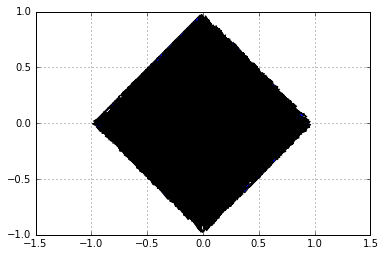

In [22]:
plot_disk(1)

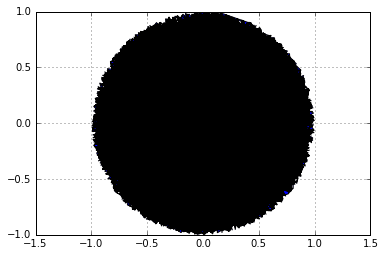

In [23]:
plot_disk(2)

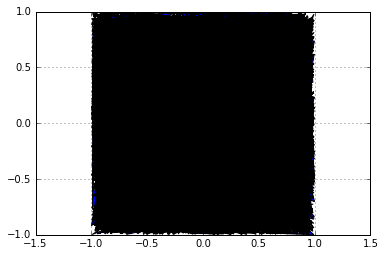

In [24]:
plot_disk(np.inf)

![](https://s-media-cache-ak0.pinimg.com/originals/56/56/4a/56564a12aadb20184126b0e4e9edc165.jpg)